# 1) Film yorumlarını sınıflandırmak : binary (ikili) sınıflandırma

Film yorumlarını iki sınıf üzerinden (pozitif - negatif) sınıflandıracağız.

In [1]:
# The IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num words, en sık geçen 10000 kelimeyi içeren verileri yükler.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]
# kelimeler yerine sayılar görüyoruz.
# veri setinde her kelimenin bir sayı karşılığı var
# bu sayısal da o kelimelerin indislerini veriyor.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]
# negatif: 0 - pozitif: 1
# eğitim veri setindeki ilk yorum pozitifmiş

np.int64(1)

In [ ]:
# 10000 kelime ile kendimi sınırlamıştık
max([max(sequence) for sequence in train_data])


9999

In [ ]:
# sayıları tekrardan kelimelere dönüştürme

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# ilk 3 indisi (0: padding, 1: start of sequence, 2: unknown) veri seti kendi aldığı için
# her sayının indisinden 3 çıkarıyoruz

In [ ]:
word_index["the"]

1

In [ ]:
# ilk örnekteki ikinci sayımız 14'tü fakat bundan üç çıkarmamız gerekiyor
reverse_word_index[14-3]

'this'

Girişteki tensorumuzun sabit uzunlukta olmasını istiyoruz. Çünkü bazı yorumlar 10 farklı kelimeden oluşuyor, bazıları 100 farklı kelimeden oluşuyor. Bunların boyutlarının aynı olmasını istiyoruz. Bunu da `multi-hot encoding` ile yapıyoruz.

Elimizde 10000 farklı kelime var toplamda. Tensorların boyutu 10000 olacak.
* Bu 10.000 kelimedeki kelimelerden hangileri bizim yorumumuzda varsa onların indisleri 1 olarak işaretlenecek, olmayanlar 0 olarak işaretlenecek.

Böylelikle 100 farklı kelime olan yorumun tensorunda 100 adet 1, 10.000-100 kadar da sıfır olacak.

Benzer şekilde 10 farklı kelime olan yorumun tensorunde 10 adet 1, 10.000 - 10 adet sıfır bulunacak.

Böylelikle tensorların boyutları eşitlendi

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # len(sequences) : toplam yorum sayısı
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Yukarıdaki kodda for döngüsünde tüm yorumlar teker teker geziliyor. i, bizim yorum indeksimiz

i = 0 için
* 1. yorumdaki kelimelerin indeksleri [1,14,20] alınıyor
* result[0, 1],result[0,14], result[1,20] 1 yapılıyor
böylelikle ilk yorum için 3 adet bir oluşturuldu diğerleri sıfır

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# aynı şekilde etiketlerimizi de vektörize etmemiz gerekiyor
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Modeli inşa etmek
Artık giriş verilerimizi sinir ağına girebilecek şekilde vektörize ettik. Girişlerimiz vektör, etiketlerimiz ise skalar (0-1).

Bu problem için dense katmanı ve relu aktivasyon fonksiyonu kullanacağız.

Dense için karar vermemiz gereken 2 şey var. Bunlar:
- kaç katman (layer) kullanacağız
- her katmanda kaç tane unit kullanacağız


Bunun detayları 5. bölümde

Şimdilik biz 2 adet 16 unit'lik katman kullanacağız.

üçüncü ve son katman ise bizim çıkış katmanımız olacak ve bize pozitif (1) ya da negatif (0) sonucunu verecek


In [ ]:
# klasik model formatı

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16 unit olması, 16 adet ağırlık (w) olması anlamına geliyor.
# w_shape = (input_dimension, 16)

Modelimizi oluşturduk, bir sonraki adım ise loss fonksiyonu ve optimizer seçmek.

Binary classification yaptığımız için en uygun olan
- loss fonksiyonu: `binary_crossentropy` ya da `mean_squared_error`. Fakat crossentropy çok daha iyi.
- optimizer için ise `rmsprop`


metric olarak ise doğruluğu `accuracy` alıyoruz.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validation verilerinin hazırlanması

In [ ]:
print(x_train.shape)

x_val = x_train[:10000]
print(x_train[:10000].shape)

partial_x_train = x_train[10000:]
print(x_train[10000:].shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(25000, 10000)
(10000, 10000)
(15000, 10000)


In [ ]:
# eğitimde 20 epochs kullanacağız. toplamda 20 kez eğitim olacak,
# her bir eğitimde ise batch_size olarak 512 kullanacağız
# 20 * 512 = 10240

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6857 - loss: 0.5982 - val_accuracy: 0.8691 - val_loss: 0.3790
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8941 - loss: 0.3274 - val_accuracy: 0.8490 - val_loss: 0.3483
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9176 - loss: 0.2446 - val_accuracy: 0.8891 - val_loss: 0.2788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9415 - loss: 0.1865 - val_accuracy: 0.8736 - val_loss: 0.3132
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9459 - loss: 0.1600 - val_accuracy: 0.8855 - val_loss: 0.2802
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9602 - loss: 0.1297 - val_accuracy: 0.8803 - val_loss: 0.3091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9665 - loss: 0.1140 - val_accuracy: 0.8832 - val_loss: 0.3098
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9729 - loss: 0.0990 - val_accuracy: 0.8799 - 

In [ ]:
history_dict = history.history # eğitim geçmişini tutmak
history_dict.keys() # history dict olarak kaydedildiğin için anahtar:değer (key:value) olarak çalışıyor. hangi anahtarlar var?


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

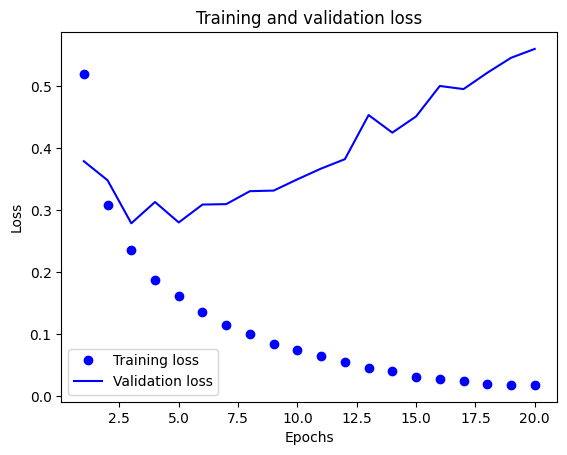

In [ ]:
# eğitim ve geçerleme (validation) kayıplarının (loss) grafiğe dökülmesi

import matplotlib.pyplot as plt
# history_dict = history.history # yukarıda yapmıştık
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss") # bo: blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # b: solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




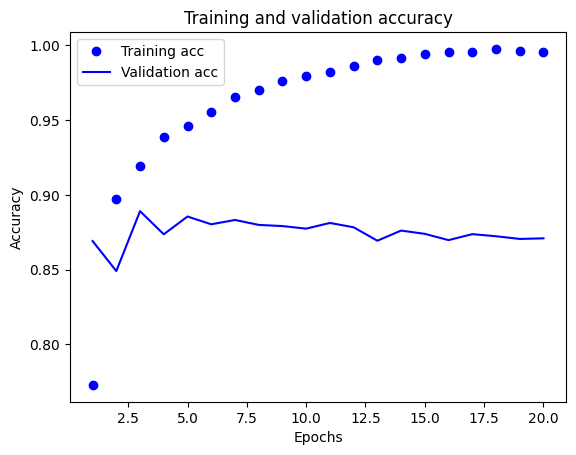

In [ ]:
# eğitim ve geçerleme doğruluğu

plt.clf() # figürü temizle

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grafiklere baktığımızda validation ve eğitim arasında çok fazla fark olduğunu görüyoruz. Bu modelin artık eğitim verilerini ezberlediğini, ilk kez gördüğü validation veri setinde ise afalladığını gösteriyor: `OVERFITTING`.


Modelin kötüye gittiği nokta olarak epoch'un 4 olduğu noktayı alabiliriz. Bu sebeple epochs=4 alarak modeli tekrardan eğitelim.

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6448 - loss: 0.6177
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8891 - loss: 0.3589
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9150 - loss: 0.2523
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9294 - loss: 0.2051
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.2871


In [ ]:
results # loss: 0.29 - acc: 0.89

# fakat %89 yeterli değil, %95'e olabildiğince yaklaşmayı isteriz.



[0.28588661551475525, 0.8870400190353394]

## eğitilmiş model ile yeni veriler üzerinde tahminlerde bulunma

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.21798524],
       [0.99993783],
       [0.86166596],
       ...,
       [0.12418988],
       [0.10897428],
       [0.47421545]], dtype=float32)

Görüldüğü üzere tahminlerinde 0.99993783 gibi çok yüksek oranda emin olduğu tahminler varken daha az emin olduğu 0.47421545 gibi tahminleri de var.




# **TODO**:
- 2 katman kullandık. Bunu 1 ve 3 katman ile dene
- Her katmana daha fazla ya da daha az units ekle: 32, 64...
- loss fonksiyon olarak binary_crossentropy yerine mse koy
- relu yerine tanh kullan

ve loss'un, accuracy'nin nasıl değiştiğine bak (tablo haline getirilebilir)

# 2) Haber bültenlerini sınıflandırmak: çok-sınıflı (multiclass) sınıflandırma

eğer ki her bir veri yalnızca bir sınıfa ait ise: single-label multiclass classification

birden fazla sınıfa/kategoriye aitse multilabel multiclass classification


In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(train_data)

8982

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [4]:
len(test_data)

2246

In [9]:
train_data[10] # yine kelimeler belli sayılar ile eşleşmiş.

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
train_labels[10] # konular 0 - 45 arasında sayılarla ifade ediliyor

np.int64(3)

## verinin hazırlanması
verileri vektör haline getiriyoruz

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
# aynı şekilde etiketlerimizi de vektör haline getireceğiz [0,0,0,0,0,0,0,1,0,0,0,0] gibi
# burada da yöntem olarak "one-hot encoding" kullanılacak

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [19]:
# direkt olarak bunu yapan bir fonksiyon keras'ta mevcut

# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

## modelin oluşturulması

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## validation veri setinin hazırlanması

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.4335 - loss: 3.0549 - val_accuracy: 0.6180 - val_loss: 1.7451
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6607 - loss: 1.5771 - val_accuracy: 0.6870 - val_loss: 1.3823
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7402 - loss: 1.1990 - val_accuracy: 0.7320 - val_loss: 1.1995
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7794 - loss: 0.9893 - val_accuracy: 0.7630 - val_loss: 1.0969
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8190 - loss: 0.8113 - val_accuracy: 0.7720 - val_loss: 1.0210
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8521 - loss: 0.6764 - val_accuracy: 0.7930 - val_loss: 0.9622
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8826 - loss: 0.5701 - val_accuracy: 0.8060 - val_loss: 0.9083
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9096 - loss: 0.4686 - val_accuracy: 0.8110 - v

## grafikler ile sonuçlara bakma

In [27]:
import matplotlib.pyplot as plt

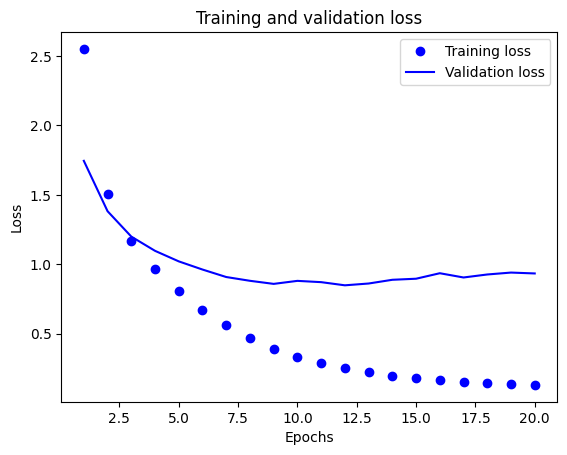

In [28]:
# eğitim ve validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

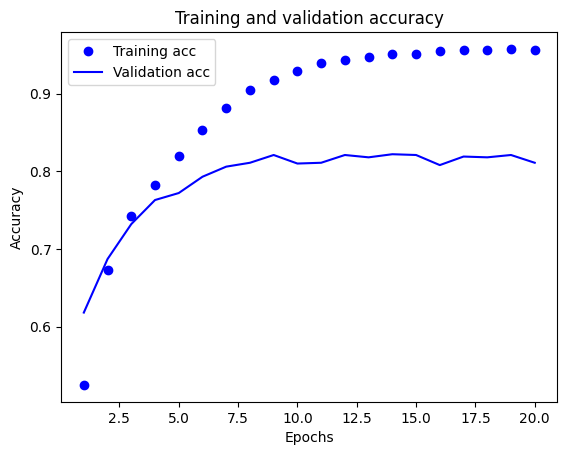

In [29]:
# eğitim ve validation doğruluğu
plt.clf()

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Görüyoruz ki 9 epcoh'tan sonra `overfit` oluyor modelimiz. Biz de ona göre epoch'u 9'a sınırlayarak tekrardan yazalım

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.4220 - loss: 3.0731
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.6795 - loss: 1.5240
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.7426 - loss: 1.1538
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7968 - loss: 0.9287
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8323 - loss: 0.7668
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8684 - loss: 0.6259
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8971 - loss: 0.4978
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9124 - loss: 0.4192
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9270 - loss: 0.3535


In [34]:
results = model.evaluate(x_test, y_test)
# evaluate şöyle çalışıyor
# x_test ile y_tahminler üret
# bu tahminleri y_test ile karşılaştır
# bu değerler üzerinden loss ve accuracy testi yap
# metrics farklı seçilirse onun üzerinden test yapar

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.8766


In [32]:
results

[0.909360408782959, 0.7943009734153748]

## Rastgele tahminler ile doğruluk test etme

sonuçlarımızda
- loss: 0.9
- accuracy: 0.79 çıktı

peki bunlar çok mu kötü?

Rastgele tahmin yapan bir modelin ne kadar doğru sonuç vereceğini test edelim

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

# %19 doğruluk verdi, bizim modelimiz ise %79 vermişti. iyi gidiyoruz

np.float64(0.1892252894033838)

## Yeni veri üzerinde tahminler oluşturma

In [37]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [41]:
predictions[0].shape # 46 sonuç geldi çünkü 46 kategori var.
# her bir kategoriye ne kadar ait olduğunun oranları var

(46,)

In [40]:
np.sum(predictions[0])
# tüm bu oranlar 0 - 1 arasında sayılar olduğu için. toplamları 1 çıkıyor

np.float32(1.0000001)

1 çıkmasının sebebi:

elimizde 46 adet kategori var. bir örneği alıyoruz ve diyoruz ki %3 ihtimalle bu 1. kategoriye ait, %7 ikinci kategoriye ait. Tüm bu olasılıkların toplamının %100 olması gerekir.

Biz softmax kullandığımız ve 0-1 arasına normalize ettiğimiz için 100 gibi bir değer çıkmıyor da toplam olasılık 1 çıkıyor

In [43]:
np.argmax(predictions[0]) # en yüksek olasılık hangi sınıf/kategori
# bu bize değer değil indeks veriyor

np.int64(3)

In [44]:
predictions[0][3]

np.float32(0.5628971)

## etiketleri ve loss'u elde etmenin farkı yolu


In [46]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# etiketleri bir integer tensörüne dönüştürdük.
# Compile ederken değiştirmemiz gereken tek şey ise loss fonksiyonu: sparse_categorical_crossentropy

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## gizli katmanların sayısı
Çıkış katmanımızda 46 birim var. Biz ara katmanlarda, gizli katmanlarda 46'dan - genel olarak çıkış katmanından - daha unit olmamasını isteriz.

Sebebini 4-boyutlu bir gizli katman kullanarak görelim

In [47]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1499 - loss: 3.3564 - val_accuracy: 0.3730 - val_loss: 2.4625
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3790 - loss: 2.3087 - val_accuracy: 0.3980 - val_loss: 2.0340
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4514 - loss: 1.8220 - val_accuracy: 0.6390 - val_loss: 1.5925
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6788 - loss: 1.4488 - val_accuracy: 0.6620 - val_loss: 1.3964
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7045 - loss: 1.2212 - val_accuracy: 0.6920 - val_loss: 1.3411
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7297 - loss: 1.1122 - val_accuracy: 0.6950 - val_loss: 1.3267
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7440 - loss: 1.0640 - val_accuracy: 0.7010 - val_loss: 1.3135
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7462 - loss: 1.0166 - val_accuracy: 0.6930 - v

Görüyoruz ki
- **accuracy: 0.7925**
- loss: 0.6934
- val_accuracy: 0.6930
- val_loss: 1.5456

4 yerine 64 unit olduğunda ise değerlerimiz şöyleydi:
- **accuracy: 0.9580**
- loss: 0.1253
- val_accuracy: 0.8110
- val_loss: 0.9340

Bariz oranda doğruluk düştü

# TODO
- farklı unitleri dene: 32, 128, ...
- şu anda iki hidden layer var. Bir HL veya 3 HL ile dene

# 3) Ev fiyatlarını tahmin etme: Regresyon

506 örnek var, 404 eğitim, 102 test.

 feature'lar farklı skalalarda. Bazıları 0-1 arasında değişirken bazıları 1-12 ya da 0-100 gibi değişkenlik gösterebiliyor

In [3]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data()
)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data.shape # 404 sample, 13 feature

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets # ortalama fiyatlar (bin dolar seviyesinde)

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## veriyi hazırlama

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Normalize etmek (normalization)
Yukarıda anlamsız gibi görünen çok fazla şey yaptık fakat bu modelimizin daha iyi çalışmasını sağlayacak.

Bahsettiğimiz üzere feature'ların değer skalaları çok farklı olabiliyor, bazılarında 0-1 arasında değişirken bazıları 100 olabiliyor. Bu da bazı feature'ların doğal olarak gereksiz bir şekilde diğerlerini çok fazla baskılayabileceği anlamına geliyor. Belki de önemsiz bir veri fakat doğal olarak diğerlerinden çok büyük olduğu için onları baskılayacak. Amacımız tüm bu feature değerlerini belli bir aralığa oturtmak.

İlk adım: `mean` yani ortalama `axis=0` anlamı sütun bazında işlem yapılması gerektiğidir.

|Feature index| Oda sayısı | suç oranı |
|---|---|---|
|1|5|0.1|
|2|7|0.5|
|3|9|0.9|

Bu durumda bu ikisini birbirine yaklaştıracağız. Sütun bazında ortalama alıyoruz

Oda sayısı için: ( 5 + 7 + 9 ) / 3 = 7.0

Suç oranı için ( 0.1 + 0.5 + 0.9 ) / 3 = 0.5

sonrasında bunu 2. satırda eğitim_setinden ortalamaları çıkarıyoruz.

|Feature index| Oda sayısı | suç oranı |
|---|---|---|
|1|5-7.0|0.1-0.5|
|2|7-7.0|0.5-0.5|
|3|9-7.0|0.9-0.5|

böylelikle

|Feature index| Oda sayısı | suç oranı |
|---|---|---|
|1|-2|-0.4|
|2|0|0.0|
|3|2|0.4|

Bu adıma "**ortalama sıfırlama (zero-mean)"** denir

Adım 3. Standart sapma (std)

Buradaki amacımız ise o verinin ortalamadan ne kadar uzakta olduğunu anlamak

oda sayısındaki değişim çok fazla ise -> std büyük

suç oranı değişimi az ise -> std küçük

Bu yöntemle ortalamadan ne kadar "iyi" ya da ne kadar "kötü" olduğunu öğreneceğiz. Her bir sütun için birer sayı verecek bize.

Örneğin: `[1.632, 0.326]` verdi

eğitim verisini std'ye bölüyoruz

|Feature index| Oda sayısı | suç oranı |
|---|---|---|
|1|-2/1.632|-0.4/0.326|
|2|0/1.632|0.0/0.326|
|3|2/1.632|0.4/0.326|

Böylelikle sonucumuz

|Feature index| Oda sayısı | suç oranı |
|---|---|---|
|1|-1.22|-1.22|
|2|0|0|
|3|+1.22|+1.22|


Başlangıçta 5 ile 0.1 şeklinde arada 50 katlık bir fark vardı, normalizasyon sonrasında ise artık birbirlerine çok yakınlar (bu örnekte aynılar fakat her zaman böyle olması gerekmez)

## modeli oluşturma
Aynı modeli birden fazla kez oluşturmamız gerektiği için (K-fold cross-validation) fonksiyon içine yazıyoruz. Tekrar tekrar kullanabilelim diye.

çıkış katmanında sadece 1 birim var ve aktivasyon fonksiyonu yok. Çünkü biz bir fiyat tahmini yapıyoruz, hangi sınıfa ait olduğunu bilmemize gerek yok, skalar bir sayı elde edeceğiz.

MAE: mean absolute error. Yani tahminimiz ile gerçek değer arasındaki fark. Bu örnek için 0.5'lik bir fark 500 dolara karşılık gelir

In [8]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])

  model.compile(optimizer="rmsprop",
                loss="mse",  # mean squared error, regresyon için çok kullanılır
                metrics=["mae"]) # MAE: mean absolute error
  return model



## K-fold validation ile geçerleme

Modeli eğitirken bazı parametrelerin güncellenmesi gerekir (epoch gibi), bu sebeple eğitim ve geçerlemeyi hep ayırdık. Fakat burada verilerimizin sayısı çok az ve başarı hangi verilerin eğitimde, hangilerinin geçerlemede kullanıldığına göre çok büyük farklarla ortaya çıkabilir.

Bunu çözebilmek için de K-fold validation kullanılıyor.

Bu şöyle çalışıyor:

- Tüm veri setini K kadar bölüyor (K=3 diyelim)

| Validation | Training   | Training   |

| Training   | Validation | Training   |

| Training   | Training   | Validation |

- Her seferinde bir parça doğrulama (validation) için kullanılırken, kalan K−1 parça eğitim (training) için kullanılır.

- Bu işlem K kez tekrarlanır; her veri parçası bir kez doğrulama verisi olarak kullanılmış olur.


Böylelikle daha güvenilir ve kararlı bir sonuç elde edilir.


In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

k = 4
num_val_samples = len(train_data) // k # 4'e tam olarak kaçar kaçar bölündüğüne bakıyor
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
       axis=0)
  model = build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=1,
            verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # verbose=0 sessizce yap, her adımı bildirme
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [13]:
all_scores

[2.016282558441162, 2.3395931720733643, 2.851806402206421, 2.1586432456970215]

In [14]:
np.mean(all_scores) # 2.35 yani yaklaşık $2.350 bir hata payımız var
# veri setindeki evlerin fiyatları $10.000 ile $50.000 dolar arası

np.float64(2.341581344604492)

In [15]:
# her bir fold'daki değerlerin kaydedilmesi

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )

    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=16, verbose=0
    )
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

## grafik

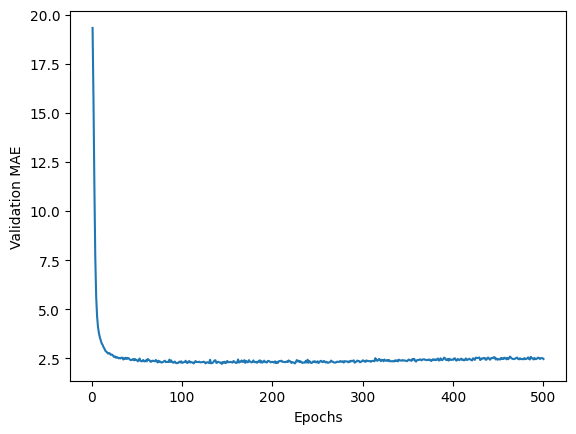

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

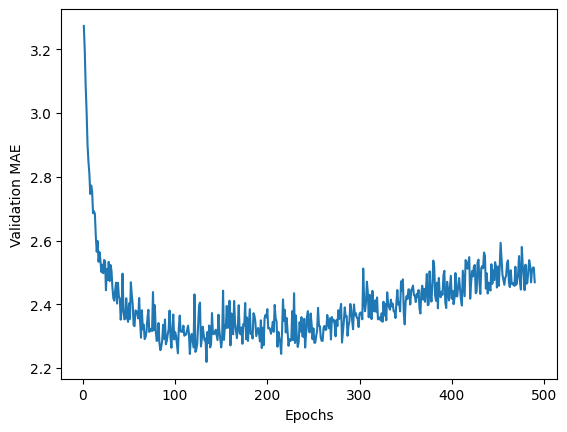

In [18]:
# ilk 10 değer için validation skoruna bakma
truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [19]:
# 120 - 140'tan sonra gelişmeyi bırakmış. Sonrasında overfitting başlamış
# epoch'u 130'a sınırlayalım

model = build_model()

model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 11.5671 - mae: 2.3543


In [20]:
test_mae_score

2.525979995727539

## tahmin oluşturma

In [27]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([7.775895], dtype=float32)

In [28]:
test_targets[0] # orijinal değer 7.2 bizim bulduğumuz 7.77

np.float64(7.2)